In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

## Lendo dados de treino e teste

In [189]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [190]:
train.head()

,name,sex,age,sibsp,parch,ticket,fare,embarked,pclass,survived
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,1
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,1
2,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1,0
3,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,1,1
4,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S,1,1


In [191]:
test.head()

,name,sex,age,sibsp,parch,ticket,fare,embarked,pclass
0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,S,1
1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,S,1
2,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,S,1
3,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C,1
4,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,1


In [192]:
print(train.shape)
print(test.shape)

(1000, 10)
(309, 9)


## Visualização de dados

Como primeira observação, vemos que a maioria dos tripulantes não sobreviveu ao naufrágio.

In [193]:
print('Sobreviventes:',train['survived'].value_counts()[0],'\nNão sobreviventes:',\
      train['survived'].value_counts()[1])

Sobreviventes: 608 
Não sobreviventes: 392


##### Observação de dados nulos

In [194]:
print("Dados de treino: ")
for col in train.columns:
    if train[col].isnull().values.any():
        print(col, train[col].isnull().sum())
      
print("\nDados de teste:")
for col in test.columns:
    if test[col].isnull().values.any():
        print(col, test[col].isnull().sum())


Dados de treino: 
age 210
fare 1
embarked 2

Dados de teste:


##### Observações com a coluna 'sex'

In [195]:
print('Male:',train['survived'].value_counts()[0],'\nFemale:',\
      train['survived'].value_counts()[1])

Male: 608 
Female: 392


Com os dados acima, temos que a maioria dos tripulantes são do sexo masculino. No entanto, é possível observar no gráfico abaixo que a maioria dos sobreviventes são do sexo feminino.

<AxesSubplot:xlabel='sex', ylabel='count'>

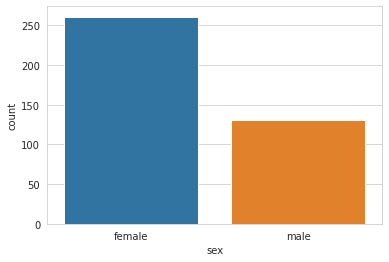

In [196]:
sns.countplot(x='sex', data=train[train['survived']==1])

Essas informações são importantes pois demonstram que uma transformação na coluna 'sex' pode ter grande valor preditivo.

##### Observações com a coluna 'age'

In [197]:
train['age'].describe()

count    790.000000
mean      29.680380
std       14.085014
min        0.333300
25%       21.000000
50%       28.000000
75%       38.000000
max       70.500000
Name: age, dtype: float64

Como a descrição acima, é notável que os tripulantes, de modo geral, eram jovens/adultos. Até 50% dos tripulantes possuíam 28 anos ou menos, e 75% 38 anos ou menos. Essas informações podem ser visualizadas no histograma abaixo.

<AxesSubplot:xlabel='age', ylabel='Density'>

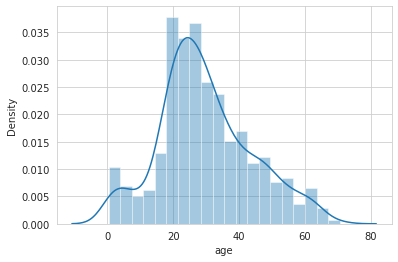

In [198]:
sns.distplot(train['age'])

##### Observações com a coluna 'pclass'

No gráfico abaixo, vemos que a única classe em que a maioria sobreviveu foi a primeira classe.

<AxesSubplot:xlabel='pclass', ylabel='count'>

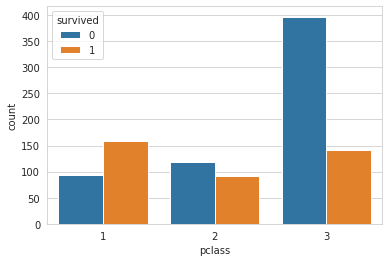

In [199]:
sns.countplot(x='pclass',hue='survived',data=train)

Associando com as informações obtidas analisando a coluna 'sex', percebemos um número relativamente equilibrado na primeira e segunda classe, enquanto que, na terceira classe, uma maioria absoluta de pessoas do sexo masculino. É um dado importante, já que a terceira classe obteve a pior relação entre sobreviventes/não sobreviventes.

<AxesSubplot:xlabel='sex', ylabel='count'>

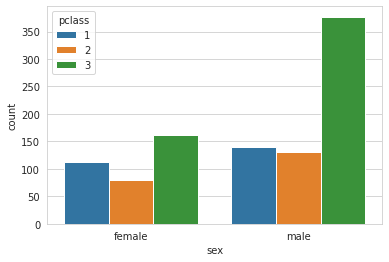

In [200]:
sns.countplot(x='sex',hue='pclass',data=train)

##### Observações com as colunas 'sibsp' e 'parch 

Observando a contagem de ambas as colunas abaixo, concluímos que a maioria das pessoas não possuía familiares embarcados. Esta informação pode ser um indicativo de que familiares presentes aumentam as taxas de sobrevivência.

In [201]:
train['sibsp'].value_counts()

0    689
1    236
2     32
4     17
3     16
8      6
5      4
Name: sibsp, dtype: int64

In [202]:
train['parch'].value_counts()

0    767
1    133
2     79
3      8
5      5
4      5
9      2
6      1
Name: parch, dtype: int64

##### Observações com as colunas 'embarked'


In [203]:
print('S (Southampton):',train['embarked'].value_counts()[0],\
      '\nC (Cherbourg):',train['embarked'].value_counts()[1],\
      '\nQ (Queenstown):',train['embarked'].value_counts()[2])

S (Southampton): 686 
C (Cherbourg): 219 
Q (Queenstown): 93


O porto 'S' (Southampton) foi o com maior número de embarcados, além do maior número absoluto de sobreviventes. No entanto, o único porto em que a maioria das pessoas sobreviveu foi o porto 'C' (Cherbourg).

<AxesSubplot:xlabel='embarked', ylabel='count'>

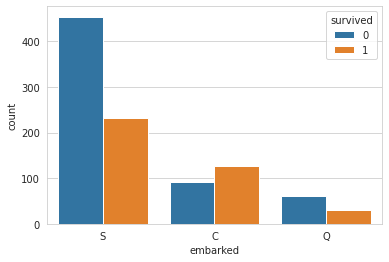

In [204]:
sns.countplot(x='embarked',hue='survived',data=train)

##### Observações com a coluna 'name'

Usando uma sintaxe de regEx para observar os títulos no nomes, podemos ver que os títulos de 'Mr.' e 'Miss' são os que mais aparecem nos dados de treino.

In [205]:
train['name'].str.extract('([A-Za-z]+)\.').value_counts()

Mr          580
Miss        197
Mrs         151
Master       48
Dr            6
Rev           5
Col           4
Mlle          2
Sir           1
Ms            1
Mme           1
Major         1
Lady          1
Don           1
Countess      1
dtype: int64

Já que, nos nomes, apenas os títulos nos interessam, podemos substituir a coluna 'name' pelos respectivos títulos para realizar outras observações.

In [206]:
train['name'] = train['name'].str.extract('([A-Za-z]+)\.')

No gráfico abaixo, obseramos que os títulos de 'Miss', 'Master, 'Mr', e 'Mrs' aparentam ter grande importância preditiva.

<AxesSubplot:xlabel='name', ylabel='count'>

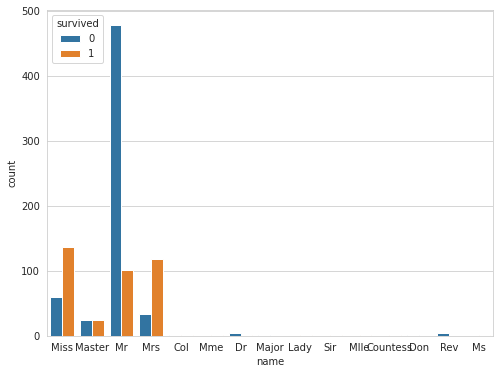

In [207]:
plt.figure(figsize=(8,6))
sns.countplot(x='name',hue='survived',data=train)

##### Observações com a coluna 'fare'

Através dos dados e do gráfico abaixo, observamos que os passageiros que pagaram uma passagem com valor abaixo da média tiveram uma relação muito pior de sobrevivência.

In [208]:
train['fare'].describe()

count    999.000000
mean      33.788309
std       53.985552
min        0.000000
25%        7.895800
50%       14.454200
75%       31.275000
max      512.329200
Name: fare, dtype: float64

In [209]:
train['m_fare'] = (train['fare'] > 33).astype(int)

<AxesSubplot:xlabel='m_fare', ylabel='count'>

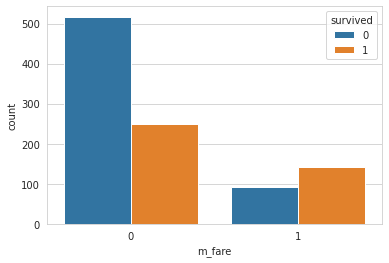

In [210]:
sns.countplot(x='m_fare',hue='survived',data=train)

## Feature Engineering

##### Tratando dados nulos

Os dados de teste não apresentaram nenhum valor nulo. Nos dados de treino, uma quantidade expressiva de dados nulos na coluna 'age' (210) e também 1 valor na coluna 'fare' serão substituídos utilizando um método de impute do modelo KNN, que preenche valores faltantes utilizando vizinhos.

In [211]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

train[['age','fare']] = imputer.fit_transform(train[['age','fare']])

Na coluna 'embarked', tempos apenas dois valores faltantes, que serão preenchidos com o valor que mais aparece ('S').

In [212]:
train['embarked'] = train['embarked'].fillna('S')

##### Transformação coluna 'sex'

Como os dados relacionados ao sexo aparentam ter grande valor preditivo, serão transformados em booleanos (0 ou 1) para serem usados no modelo.

In [213]:
map_sexo = {'male':1,'female':0}
train['sex'] = train['sex'].map(map_sexo)
test['sex'] = test['sex'].map(map_sexo)

##### Transformação coluna 'embarked'

Criação de 2 novas colunas booleanas (referente aos portos de embarque) e também a categorização da coluna embarked, com o intuito de verificar depois qual das formas o melhor resultado é obtido.

In [214]:
train['s_embarked'] = (train['embarked'] == 'S').astype(int)
train['c_embarked'] = (train['embarked'] == 'C').astype(int)
test['s_embarked'] = (test['embarked'] == 'S').astype(int)
test['c_embarked'] = (test['embarked'] == 'C').astype(int)

map_embarked = {'S':0,'C':1,'Q':2}
train['embarked'] = train['embarked'].map(map_embarked)
test['embarked'] = test['embarked'].map(map_embarked)

##### Transformação das colunas 'sibsp' e 'parch'

Já que ambas as colunas indicam que há membros da família embarcados, na tentativa de simplificar o modelo, ambas foram transformadas em uma coluna booleana 'family', que indica se há ou não membros da família presentes. Também, a criação da coluna 'is_alone', que indica 1 quando o tripulante está sozinho no navio.

In [215]:
train['family'] = (train['sibsp']+train['parch'] >0).astype(int)
test['family'] = (test['sibsp']+test['parch'] >0).astype(int)

train['is_alone'] = (train['sibsp']+train['parch']==0).astype(int)
test['is_alone'] = (test['sibsp']+test['parch']==0).astype(int)


##### Transformação da coluna 'age'

As idades foram categorizadas em 5 categorias diferentes.

In [216]:
train.loc[train['age'] <= 16, 'age'] = 0
train.loc[(train['age'] > 16) & (train['age'] <= 32), 'age'] = 1
train.loc[(train['age'] > 32) & (train['age'] <= 48), 'age'] = 2
train.loc[(train['age'] > 48) & (train['age'] <= 64), 'age'] = 3
train.loc[train['age'] > 64, 'age'] = 4 ;

test.loc[test['age'] <= 16, 'age'] = 0
test.loc[(test['age'] > 16) & (test['age'] <= 32), 'age'] = 1
test.loc[(test['age'] > 32) & (test['age'] <= 48), 'age'] = 2
test.loc[(test['age'] > 48) & (test['age'] <= 64), 'age'] = 3
test.loc[test['age'] > 64, 'age'] = 4 ;


##### Transformação da coluna 'name'

Como observado antes, alguns títulos aparentam ter uma certa importância. Os títulos 'Miss', 'Master', 'Mrs' e 'Master' foram selecionados como nomes "importantes" e mapeados, com valores de 1 a 4. Os títulos que não pertencem a esse grupo, foram classificados com o valor 0.

In [217]:
map_titulos = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4}
train['name'] = train['name'].map(map_titulos)
train['name'] = train['name'].fillna(0)

map_titulos = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4}
test['name'] = test['name'].map(map_titulos)
test['name'] = test['name'].fillna(0)

##### Transformação da coluna 'fare'

Categorizando a coluna 'fare' de acordo com os quartis já observados na visualização de dados.

In [218]:
train.loc[train['fare'] <= 7.89, 'fare'] = 0
train.loc[(train['fare'] > 7.91) & (train['fare'] <= 14.45), 'fare'] = 1
train.loc[(train['fare'] > 14.454) & (train['fare'] <= 31.27), 'fare'] = 2
train.loc[train['fare'] > 31.27, 'fare'] = 3

test.loc[test['fare'] <= 7.89, 'fare'] = 0
test.loc[(test['fare'] > 7.91) & (test['fare'] <= 14.45), 'fare'] = 1
test.loc[(test['fare'] > 14.454) & (test['fare'] <= 31.27), 'fare'] = 2
test.loc[test['fare'] > 31.27, 'fare'] = 3

### Validação

Para a validação, o método utilizado foi o RepeatedKFold. Os modelos validados foram:

1. Logistic Regression
2. XGBoost
3. Decision Tree
4. Random Forest
5. Voting


In [225]:
num_cols = ['name','sex','pclass','c_embarked','is_alone','age','family','fare']
X = train[num_cols]
y = train['survived']

In [226]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost

In [227]:
results_lr = []
results_xgb = []
results_dt = []
results_rf = []
results_vc = []
kf = RepeatedKFold(n_splits=2,n_repeats=10,random_state=10)

for train_l, valid_l in kf.split(X):
    X_train, X_valid = X.iloc[train_l],X.iloc[valid_l]
    y_train, y_valid = y.iloc[train_l],y.iloc[valid_l]
    
    model = LogisticRegression()
    model.fit(X_train,y_train)
    p = model.predict(X_valid)
    acc = np.mean(y_valid == p)
    results_lr.append(acc)

    model2 = xgboost.XGBClassifier()
    model2.fit(X_train,y_train)
    p = model2.predict(X_valid)
    acc = np.mean(y_valid==p)
    results_xgb.append(acc)

    model3 = DecisionTreeClassifier()
    model3.fit(X_train,y_train)
    p = model3.predict(X_valid)
    acc = np.mean(y_valid==p)
    results_dt.append(acc)
    
    model4 = RandomForestClassifier()
    model4.fit(X_train,y_train)
    p = model4.predict(X_valid)
    acc = np.mean(y_valid==p)
    results_rf.append(acc)
    
    model5 = VotingClassifier(estimators = [('lr',model),('rf',model4)], voting='hard')
    model5.fit(X_train,y_train)
    p = model5.predict(X_valid)
    acc = np.mean(y_valid==p)
    results_vc.append(acc)

In [228]:
print('Logistic Regression accuracy =',np.mean(results_lr))
print('XGBoost accuracy =',np.mean(results_xgb))
print('Decision Trees accuracy =',np.mean(results_dt))
print('Random Forest accuracy =',np.mean(results_rf))
print('Voting accuracy =',np.mean(results_vc))

Logistic Regression accuracy = 0.7971
XGBoost accuracy = 0.7873
Decision Trees accuracy = 0.7788999999999999
Random Forest accuracy = 0.7817999999999999
Voting accuracy = 0.7973


O modelo com o melhor resultado na validação foi o modelo de de Logistic Regression, seguido pelo Voting e XGBoost.

### Submissões

Ao invés de alterar as features em cada submissão, já que alguns modelos obtiveram resultados semelhantes na validação, decidi realizar 3 submissões, com 3 modelos diferentes. Haverá um tuning de parâmetros nas submissões.

In [231]:
from sklearn.model_selection import GridSearchCV

num_cols = ['name','sex','pclass','c_embarked','is_alone','age','family','fare']
X = train[num_cols]
y = train['survived']


In [232]:
index = np.arange(0,309,1)

##### Submissão 1

A primeira submissão foi feita utilizando o modelo de Logistic Regression.

In [233]:
lr_grid = { 
    'C': np.logspace(-4,4,20),
    'penalty': ['l1','l2'],
    'solver':['liblinear']
}

model1 = LogisticRegression()

In [234]:
gs_lr = GridSearchCV(estimator=model1, param_grid=lr_grid, cv= 5)
gs_lr.fit(X,y)
gs_lr.best_params_

{'C': 0.012742749857031334, 'penalty': 'l2', 'solver': 'liblinear'}

In [236]:
final_model1 = LogisticRegression(C=0.012742749857031334, penalty='l2',solver='liblinear').fit(X,y)
p = final_model1.predict(test[num_cols])
submission1 = pd.Series(p,index=index,name="Survived")
submission1.to_csv("jardel-submissao1.csv",header=True)

##### Submissão 2

A segunda submissão foi feita utilizando o modelo XGBoost.

In [237]:
xg_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}


model2 = xgboost.XGBClassifier()

In [238]:
gs_xg = GridSearchCV(estimator=model2, param_grid=xg_grid, cv= 5)
gs_xg.fit(X,y)
gs_xg.best_params_

{'colsample_bytree': 1.0,
 'gamma': 5,
 'max_depth': 3,
 'min_child_weight': 10,
 'subsample': 0.6}

In [239]:
final_model2 = xgboost.XGBClassifier(colsample_bytree=1.0, gamma=5, max_depth=3,\
                                     min_child_weight=10, subsample=0.6).fit(X,y)
p = final_model2.predict(test[num_cols])
submission2 = pd.Series(p,index=index,name="Survived")
submission2.to_csv("jardel-submissao2.csv",header=True)

##### Submissão 3

A terceira submissão foi feita utilizando o modelo de ensemble Voting.

In [240]:
lr = LogisticRegression(C=0.012742749857031334, penalty='l2',solver='liblinear')
xg = xgboost.XGBClassifier(colsample_bytree=1.0, gamma=5, max_depth=3,\
                                     min_child_weight=10, subsample=0.6)

model3 = VotingClassifier(estimators = [('lr',lr),('xg',xg)], voting='hard')
model3.fit(X,y)
p = model.predict(test[num_cols])
submission3 = pd.Series(p,index=index,name="Survived")
submission3.to_csv("jardel-submissao3.csv",header=True)